In [90]:
import datetime
data = datetime.datetime.now()

#CAPTURA DE FOTO DIARIA
#--- INICIO CAPTURA ---
cap = cv.VideoCapture(0)
leido, frame = cap.read()
if leido == True:
    cv.imwrite("plant-{}-{}-{}.png".format(date.month, date.day, date.year), frame) # fecha de la foto en el nombre
    #print("Foto tomada correctamente")
else:
    print("Error al acceder a la cámara")
cap.release()
#--- FIN CAPTURA ---

[81, 659.5, 359.0]
===== red ====
37.78515625
33.2421875
===== green ====
57.44140625
41.0625
===== blue ====
6.18359375
43.453125


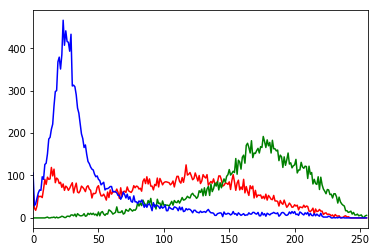

[114, 119.0, 357.5]
===== red ====
27.421875
61.38671875
===== green ====
61.92578125
74.47265625
===== blue ====
0.7421875
85.984375


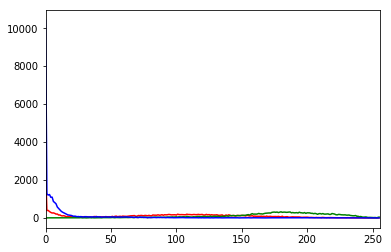

[111, 390.5519714355469, 356.2348327636719]
===== red ====
47.17578125
64.41015625
===== green ====
63.4296875
76.2890625
===== blue ====
2.3203125
43.90234375


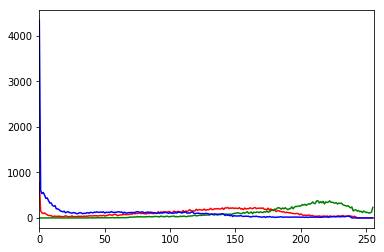

[91, 396.13916015625, 113.86592102050781]
===== red ====
34.80859375
57.19140625
===== green ====
52.40625
61.7578125
===== blue ====
8.9453125
65.61328125


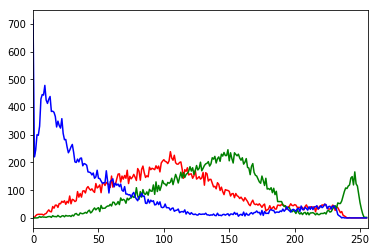

[115, 656.9933471679688, 115.4032974243164]
===== red ====
1.2734375
61.53515625
===== green ====
59.4453125
76.4609375
===== blue ====
1.69921875
107.0703125


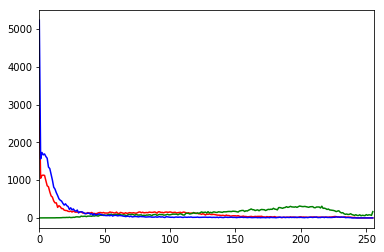

[115, 121.96553802490234, 115.33509063720703]
===== red ====
1.6171875
62.24609375
===== green ====
60.5859375
77.9140625
===== blue ====
1.8203125
107.6328125


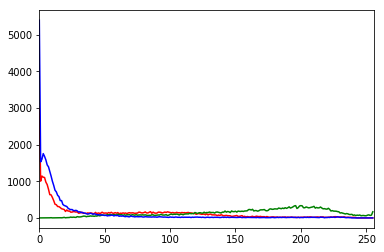

==== fitness_factors % (ideal: [1, 1, 0]) ====
[0.43802401962166276, 0.7098618594446625, 0.343119226395153]


In [211]:
plant_num = 6

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img0 = cv.imread('letucce.jpeg') # reemplazar por la foto de la fecha actual
img = cv.imread('letucce.jpeg') # reemplazar por la foto de la fecha actual

[xLen, yLen] = img.shape[:2]

ideal_area = xLen * yLen / plant_num

xL = np.arange(xLen)
yL = np.arange(yLen)

R_factor = 1.07
B_factor = 1.05

# CREANDO UNA MÁSCARA QUE PINTA DE BLANCO TODO LO VERDE Y NEGRO LO DEMÁS
for i in xL:
    for j in yL:
        green_px = img0[i, j, 1]
        if green_px > R_factor * img[i, j, 0] and green_px > B_factor * img[i, j, 2]:
            img[i, j, :] = [255, 255, 255]
        else:
            img[i, j, :] = [0, 0, 0]

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,th1 = cv.threshold(gray_img,200,255,cv.THRESH_BINARY)
img2,contours,hierarchy = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#img3 = cv.drawContours(image, contours, -1, (0,255,0), 3)

fit1 = []
fit2 = []
fit3 = []

for c in contours:
    # finally, get the min enclosing circle
    (rx, ry), radius = cv.minEnclosingCircle(c)
    center = (int(rx), int(ry))
    radius = int(radius)
    
    area = cv.contourArea(c)
    
    # and draw the circle in blue
    if radius > 50:
        fit1.append(area / ideal_area)
        
        # get the bounding rect
        y, x, h, w = cv.boundingRect(c)
        # draw a green rectangle to visualize the bounding rect
        #cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  
                        
        mask = np.zeros(img0.shape[:2], np.uint8)
        
        mask[x:x+w, y:y+h] = th1[x:x+w, y:y+h]   
        
        hist_mask_R = cv.calcHist([img0],[2],mask,[256],[0,256])
        hist_mask_G = cv.calcHist([img0],[1],mask,[256],[0,256])
        hist_mask_B = cv.calcHist([img0],[0],mask,[256],[0,256])

        # Number of total frequencies of the actual mask (no matter the channel :p !!!)
        total_mask_fc = np.sum(hist_mask_R)
        
        r_fc = []
        g_fc = []
        b_fc = []
        
        r_val = []
        g_val = []
        b_val = []
        
        for k in np.arange(256):
            r_percentage = hist_mask_R[k][0] / total_mask_fc
            g_percentage = hist_mask_G[k][0] / total_mask_fc
            b_percentage = hist_mask_B[k][0] / total_mask_fc
            
            if r_percentage >= 0.005:
                r_fc.append(hist_mask_R[k][0])
                r_val.append(k)
                
            if g_percentage >= 0.005:
                g_fc.append(hist_mask_G[k][0])
                g_val.append(k)
                
            if b_percentage >= 0.005:
                b_fc.append(hist_mask_B[k][0])
                b_val.append(k)
         
        if r_fc == []:
            r_fc = [0]
            r_val = [0]
        
        if g_fc == []:
            g_fc = [0]
            g_val = [0]
            
        if b_fc == []:
            b_fc = [0]
            b_val = [0]
    
        from functools import reduce
        
        # Histogram Frecuencies average
        r_fc_av = reduce((lambda x, y: x + y),r_fc) / 256
        g_fc_av = reduce((lambda x, y: x + y),g_fc) / 256
        b_fc_av = reduce((lambda x, y: x + y),b_fc) / 256

        # Histogram Values average
        r_val_av = reduce((lambda x, y: x + y),r_val) / 256
        g_val_av = reduce((lambda x, y: x + y),g_val) / 256
        b_val_av = reduce((lambda x, y: x + y),b_val) / 256
        
        fit2.append(g_val_av / (r_val_av + g_val_av + b_val_av))
        
        fit3.append(g_fc_av / (r_fc_av + g_fc_av + b_fc_av))
                        
        print([radius, rx, ry])
        print('===== red ====')
        print(r_val_av)
        print(r_fc_av)
        print('===== green ====')
        print(g_val_av)
        print(g_fc_av)
        print('===== blue ====')
        print(b_val_av)
        print(b_fc_av)
            
        plt.plot(hist_mask_R, 'r')
        plt.plot(hist_mask_G, 'g')
        plt.plot(hist_mask_B, 'b')
        plt.xlim([0,256])
        plt.show()
        
        print('===========================================================================')

        # get the min area rect
        rect = cv.minAreaRect(c)
        box = cv.boxPoints(rect)
        # convert all coordinates floating point values to int
        box = np.int0(box)
        # draw a red 'nghien' rectangle
        #cv.drawContours(img, [box], 0, (0, 0, 255))
        
        cv.drawContours(img, [box], 0, (0, 0, 255))
        cv.rectangle(img, (y, x), (y+h, x+w), (0, 255, 0), 2)
        img_final = cv.circle(img, center, radius, (255, 0, 0), 2)

print('==== fitness_factors % (ideal: [1, 1, 0]) ====')

Fit1 = reduce((lambda x, y: x + y),fit1) / plant_num
Fit2 = reduce((lambda x, y: x + y),fit2) / plant_num
Fit3 = reduce((lambda x, y: x + y),fit3) / plant_num

Fit = [Fit1, Fit2, Fit3]

print(Fit)
        
#img4 = cv.drawContours(img_final, contours, -1, (255, 255, 0), 1)

#cv.imshow('img3', img3)
#cv.imshow('img', img)
#cv.imshow('img4', img4)
#cv.imshow('img_final', img_final)
cv.imshow('img0', img0)
#cv.imshow('mask', mask)
#cv.imshow('th1', th1)

cv.waitKey(0)
cv.destroyAllWindows()

In [72]:
import psycopg2 as pg
import json
con = pg.connect("dbname='raphi_database' user='raphi_role' password='raphi_password' host='localhost'")
cur = con.cursor()
cur.execute("select * from metrics")
rows = cur.fetchall()
type(rows)

list

In [210]:
import pandas as pd

# Create a values as dictionary of lists
raw_data = {'0': ['first_name', 'Molly', 'Tina', 'Jake', 'Amy'], 
        '1': ['last_name', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        '2': ['age', 52, 36, 24, 73], 
        '3': ['preTestScore', 24, 31, 2, 3]}

# Create a dataframe
df = pd.DataFrame(raw_data)

# View a dataframe
df
# Create a new variable called 'header' from the first row of the dataset
header = df.iloc[0]
df = df[1:]
df = df.rename(columns = {"A": "a", "B": "c"})
df


'first_name'

In [164]:
df = pd.DataFrame(np.random.random((200,3)))
df['date'] = pd.date_range('2000-1-1', periods=200, freq='D')
df = df.set_index(['date'])
print(df.loc['2000-6-1':'2000-6-10'])
df

                   0         1         2
date                                    
2000-06-01  0.802379  0.819141  0.440684
2000-06-02  0.828847  0.662013  0.412091
2000-06-03  0.909721  0.998893  0.365324
2000-06-04  0.630474  0.084906  0.362372
2000-06-05  0.349951  0.714052  0.821544
2000-06-06  0.990154  0.729630  0.366884
2000-06-07  0.043132  0.803491  0.117142
2000-06-08  0.454724  0.141436  0.651397
2000-06-09  0.893688  0.330263  0.793932
2000-06-10  0.797482  0.446062  0.441077


,0,1,2
date,,,
2000-01-01,0.509372,0.996908,0.029010
2000-01-02,0.444449,0.517590,0.733110
2000-01-03,0.928605,0.431575,0.127209
2000-01-04,0.786737,0.583488,0.147370
2000-01-05,0.814405,0.882849,0.931946
2000-01-06,0.577153,0.635530,0.266065
2000-01-07,0.833897,0.542643,0.565619
2000-01-08,0.839347,0.988256,0.165354
2000-01-09,0.994914,0.964136,0.398789


In [158]:
def subset(arr):
    return arr[3]
    
q = map(subset, rows)
list(q)

[datetime.datetime(2018, 8, 4, 8, 43, 47, 369000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 379000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 390000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 400000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 412000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 423000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 434000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 445000, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)),
 datetime.datetime(2018, 8, 4, 8, 43, 47, 456000, tzinfo=psycopg2.tz.FixedOffset

In [54]:
def range_percentage(env_min, env_max, env_val):
    return (env_val - env_min) / (env_max - env_min)

num_of_params = 9

env_min = [0, 0, 0, 0, 0, 4, 4, 4, 4] # min_environments_params
env_max = [20, 20, 20, 20, 20, 12, 12, 12, 12] # max_environments_params

env_val = [] # environments_params_values  = [AirTemperature, TankLevel, LightIntensity, NutriSolTemperature, 
             # OxygenMonoxide, FreshAir, FreshNutriSol, AirCirculation, NutriSolCirculation]
day = 1
cycles = 4

for j in np.arange(cycles):
    for i in np.arange(num_of_params):
        if (rows[i + num_of_params * (day * j - 1)][2] == 'false'):
            env_val.append(0)
        elif (rows[i + num_of_params * (day * j - 1)][2] == 'true'):
            env_val.append(1)
        else:
            env_val.append(float(rows[i + num_of_params * (day * j - 1)][2]))
    print(env_val)
        
environment_params = list(map(range_percentage, env_min, env_max, env_val))
environment_params

[0, 0, 10361.28, 0, 0, 12.1, 10361.28, 0, 0]
[0, 0, 10361.28, 0, 0, 12.1, 10361.28, 0, 0, 0.0, 12.1, 0.0, 0.0, 0.0, 0, 0, 0, 0]
[0, 0, 10361.28, 0, 0, 12.1, 10361.28, 0, 0, 0.0, 12.1, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 12.1, 0.0, 0.0, 0.0, 0, 0, 0, 0.0]
[0, 0, 10361.28, 0, 0, 12.1, 10361.28, 0, 0, 0.0, 12.1, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 12.1, 0.0, 0.0, 0.0, 0, 0, 0, 0.0, 0, 12.1, 0.0, 0.0, 0.0, 0, 0, 0.0, 0]


[0.0, 0.0, 518.0640000000001, 0.0, 0.0, 1.0125, 1294.66, -0.5, -0.5]

[81, 659.5, 359.0]
===== red ====
37.78515625
33.2421875
===== green ====
57.44140625
41.0625
===== blue ====
6.18359375
43.453125


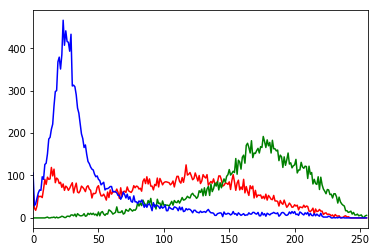

[114, 119.0, 357.5]
===== red ====
27.421875
61.38671875
===== green ====
61.92578125
74.47265625
===== blue ====
0.7421875
85.984375


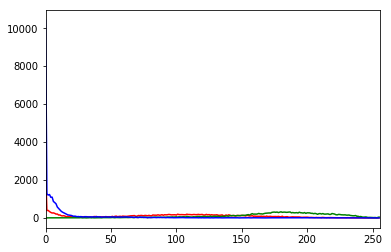

[111, 390.5519714355469, 356.2348327636719]
===== red ====
47.17578125
64.41015625
===== green ====
63.4296875
76.2890625
===== blue ====
2.3203125
43.90234375


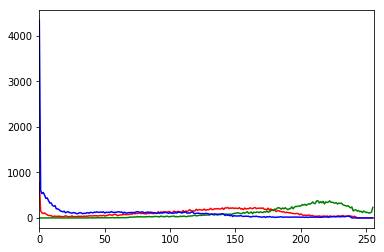

[91, 396.13916015625, 113.86592102050781]
===== red ====
34.80859375
57.19140625
===== green ====
52.40625
61.7578125
===== blue ====
8.9453125
65.61328125


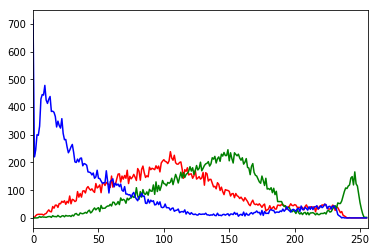

[115, 656.9933471679688, 115.4032974243164]
===== red ====
1.2734375
61.53515625
===== green ====
59.4453125
76.4609375
===== blue ====
1.69921875
107.0703125


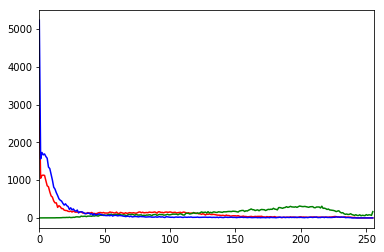

[115, 121.96553802490234, 115.33509063720703]
===== red ====
1.6171875
62.24609375
===== green ====
60.5859375
77.9140625
===== blue ====
1.8203125
107.6328125


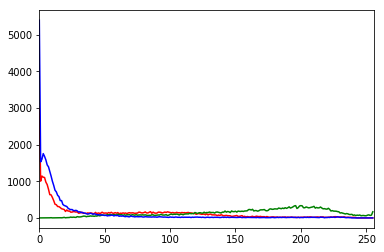

==== fitness_factors % (ideal: [1, 1, 0]) ====
[0.43802401962166276, 0.7098618594446625, 0.343119226395153]


In [41]:


# =======================================================================================================

import numpy as np

TARGET=[1,1,0];

MUT_PROB = 10;

# Obtención de los valores de las condiciones climáticas del sistema (Solo una estación) en un array
def generateGenome():
    genome = environment_params
    return genome

genome = generateGenome()

# Cálculo del los componentes fitness de la imagen diaria
def sensors2img():
    Fit1 = reduce((lambda x, y: x + y),fit1) / plant_num
    Fit2 = reduce((lambda x, y: x + y),fit2) / plant_num
    Fit3 = reduce((lambda x, y: x + y),fit3) / plant_num
    
    Fit = [Fit1, Fit2, Fit3]
    
    return Fit

# Obtención del fitness total de la imagen
def getFitness(genome):
    fitness = 0
    fitFactors = sensors2img()
    for i in np.arange(len(TARGET)):
        if (TARGET[i]-fitFactors[i] < 0.2):
            fitness = fitness + 1
    return fitness

# Generación de un conjunto ("piscina") de 50 genomas (estaciones) e inicializado con el genoma actual (Estación actual)
def getGenePool(genome):
    pool = []
    for i in np.arange(50):
        pool.append(genome)
    return pool

pool = getGenePool(genome)

# Evaluación de una piscina para obtener el genoma con mayor fitness
def getFittest(pool):
    fittestLoc = 0
    fittest = 0
    for i in np.arange(len(pool)):
        if (getFitness(pool[i]) > fittest):
            fittest = getFitness(pool[i])
            fittestLoc = i
    return pool[fittestLoc]

# Mutación de un genoma (valores nuevos para las condiciones ambientales)
def doMutation(genome):
    testGenome = genome
    newGenome = []
    for i in np.arange(len(genome)):
        if(np.round((np.random.rand()*MUT_PROB))==1):
            testGenome[i]=np.random.rand() # Estos valores deben ser implementados como Setpoint para la estación
            if(getFitness(testGenome)>getFitness(genome)):
                newGenome.append(testGenome[i])
            else:
                newGenome.append(genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

# 
def evolve():
    numGens = 0
    fittest = generateGenome()
    print('AAAAAAA')
    print(fittest)
    while(getFitness(fittest)!=3):
        numGens = numGens + 1
        pool = getGenePool(fittest)
        pool2 = []
        for i in np.arange(len(pool)):
            pool2.append(doMutation(pool[i]))
        fittest = getFittest(pool2)
        #if(numGens%10==0):
            #print('BBBBBBBB')
            #print(fittest)
    return fittest

e = evolve();

AAAAAAA
[0.0, 0.605, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


KeyboardInterrupt: 

In [21]:
len(pool)

50